Words: Milk and Coffee

In [1]:
import os
import tensorflow as tf
import numpy as np

In [2]:
new_saved = ["milk", "coffee"]

In [3]:
# Function for processing data
def process_train_data(X, y, directory, new_saved):
    for label in new_saved:
        print(label)
        dir = os.path.join(directory, label)
        for file in os.listdir(dir):
            arr = np.load(os.path.join(directory, label, file))
            
            for frame in arr:
                if len(X) == 0:
                    X = np.array([frame])
                    y = np.array([new_saved.index(label)])
                else:
                    X = np.append(X, np.array([frame]), axis=0)
                    y = np.append(y, np.array([new_saved.index(label)]), axis=0)
            

    print(X.shape, y.shape)
    return (X, y)

In [4]:
# Function for processing data
def process_val_data(X_val,y_val, X_test, y_test, directory, new_saved):
    val = False
    for label in new_saved:
        print(label)
        dir = os.path.join(directory, label)
        for file in os.listdir(dir):
            val = not(val)
            print(val)
            arr = np.load(os.path.join(directory, label, file))
            if val:
                for frame in arr:
                    if len(X_val) == 0:
                        X_val = np.array([frame])
                        y_val = np.array([new_saved.index(label)])
                    else:
                        X_val = np.append(X_val, np.array([frame]), axis=0)
                        y_val = np.append(y_val, np.array([new_saved.index(label)]), axis=0)
            else:
                for frame in arr:
                    if len(X_test) == 0:
                        X_test = np.array([frame])
                        y_test = np.array([new_saved.index(label)])
                    else:
                        X_test = np.append(X_test, np.array([frame]), axis=0)
                        y_test = np.append(y_test, np.array([new_saved.index(label)]), axis=0)

    print(X_val.shape, y_val.shape, X_test.shape, y_test.shape)
    return (X_val, y_val, X_test, y_test)

In [5]:
train_dir = "/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/MS-ASL/two_var/two_var_training_data"
X_train = np.array([])
y_train = np.array([])
X_train, y_train = process_train_data(X_train, y_train, train_dir, new_saved)

milk
coffee
(1381, 256, 256, 3) (1381,)


In [6]:
val_dir = "/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/MS-ASL/two_var/two_var_validation_data"
X_val = np.array([])
y_val = np.array([])
X_test = np.array([])
y_test = np.array([])
X_val, y_val, X_test, y_test = process_val_data(X_val, y_val, X_test, y_test, val_dir, new_saved)

milk
True
False
True
False
True
False
True
coffee
False
True
False
True
False
True
(224, 256, 256, 3) (224,) (154, 256, 256, 3) (154,)


In [7]:
#shuffle train data
import sklearn
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=42)
X_train, y_train

(array([[[[-0.33333334, -0.12941177,  0.00392157],
          [-0.3254902 , -0.12156863,  0.01176471],
          [-0.30980393, -0.12156863,  0.01176471],
          ...,
          [ 0.42745098,  0.38039216,  0.28627452],
          [ 0.42745098,  0.38039216,  0.28627452],
          [ 0.42745098,  0.38039216,  0.28627452]],
 
         [[-0.3254902 , -0.12156863,  0.01176471],
          [-0.31764707, -0.11372549,  0.01960784],
          [-0.3019608 , -0.11372549,  0.01960784],
          ...,
          [ 0.43529412,  0.3882353 ,  0.29411766],
          [ 0.42745098,  0.38039216,  0.28627452],
          [ 0.42745098,  0.38039216,  0.28627452]],
 
         [[-0.3254902 , -0.12941177,  0.01960784],
          [-0.31764707, -0.12156863,  0.02745098],
          [-0.31764707, -0.12156863,  0.02745098],
          ...,
          [ 0.44313726,  0.39607844,  0.3019608 ],
          [ 0.42745098,  0.38039216,  0.28627452],
          [ 0.42745098,  0.38039216,  0.28627452]],
 
         ...,
 
         [[-

In [8]:
#shuffle val and test data
import sklearn
from sklearn.utils import shuffle
X_val, y_val = shuffle(X_val, y_val, random_state=42)

X_test, y_test = shuffle(X_test, y_test, random_state=42)
X_test, y_test

(array([[[[ 0.28627452,  0.42745098, -0.2627451 ],
          [ 0.29411766,  0.43529412, -0.25490198],
          [ 0.29411766,  0.43529412, -0.25490198],
          ...,
          [ 0.29411766,  0.43529412, -0.25490198],
          [ 0.29411766,  0.43529412, -0.25490198],
          [ 0.29411766,  0.43529412, -0.25490198]],
 
         [[ 0.3254902 ,  0.45882353, -0.23137255],
          [ 0.33333334,  0.4745098 , -0.21568628],
          [ 0.33333334,  0.4745098 , -0.21568628],
          ...,
          [ 0.33333334,  0.4745098 , -0.21568628],
          [ 0.33333334,  0.4745098 , -0.21568628],
          [ 0.33333334,  0.4745098 , -0.21568628]],
 
         [[ 0.31764707,  0.45882353, -0.23137255],
          [ 0.3254902 ,  0.46666667, -0.22352941],
          [ 0.3254902 ,  0.46666667, -0.22352941],
          ...,
          [ 0.3254902 ,  0.46666667, -0.22352941],
          [ 0.3254902 ,  0.46666667, -0.22352941],
          [ 0.3254902 ,  0.46666667, -0.22352941]],
 
         ...,
 
         [[ 

In [9]:
from tensorflow.keras.applications.vgg16 import VGG16

vgg_model = VGG16(weights='imagenet', input_shape=(256, 256, 3), include_top=False)
vgg_model.trainable = False
vgg_model.summary()

Metal device set to: Apple M1


2023-02-14 18:26:30.548337: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-14 18:26:30.548603: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [10]:
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model

x = vgg_model.get_layer('block5_pool').output
x = Flatten(name='flatten')(x)
x = Dense(40, activation='relu')(x)
x = Dense(100, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(2, activation='softmax')(x)

vgg_model = Model(vgg_model.input, output)

In [11]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/MS-ASL/two_var/two_var_models/two_var_weights.{epoch:02d}-{val_accuracy:.2f}",
    monitor='val_accuracy',
    verbose=0,
    save_best_only=True,
    save_weights_only=False,
    mode='auto',
    save_freq='epoch',
)

In [12]:
vgg_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
vgg_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [15]:
import time
start = time.time()
history = vgg_model.fit(X_train, y_train, epochs=30, batch_size=50, validation_data=(X_val, y_val), callbacks=[checkpoint])
end = time.time()
deltaTrain = end - start
print("TIME: ", deltaTrain)

Epoch 1/30
28/28 [==============================] - 47s 2s/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 1.3817 - val_accuracy: 0.6875
Epoch 2/30
28/28 [==============================] - 45s 2s/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.4324 - val_accuracy: 0.6875
Epoch 3/30
28/28 [==============================] - 49s 2s/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.5014 - val_accuracy: 0.6875
Epoch 4/30
28/28 [==============================] - 52s 2s/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 1.5207 - val_accuracy: 0.6875
Epoch 5/30
28/28 [==============================] - 52s 2s/step - loss: 8.3221e-04 - accuracy: 1.0000 - val_loss: 1.5766 - val_accuracy: 0.6875
Epoch 6/30
28/28 [==============================] - 50s 2s/step - loss: 6.8263e-04 - accuracy: 1.0000 - val_loss: 1.6148 - val_accuracy: 0.6875
Epoch 7/30
28/28 [==============================] - 50s 2s/step - loss: 4.2888e-04 - accuracy: 1.0000 - val_loss: 1.6321 - val_accuracy: 0.6920
Epoch 8/

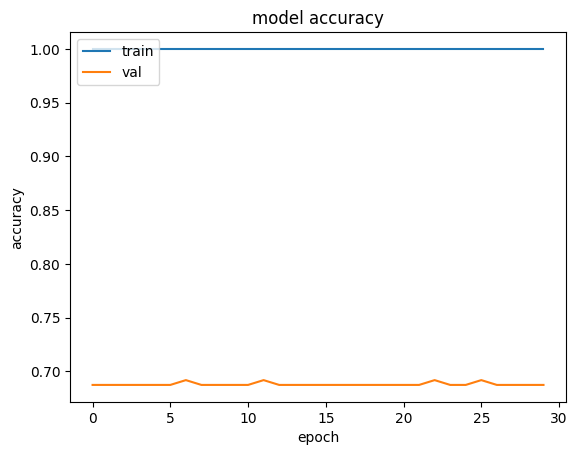

In [16]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

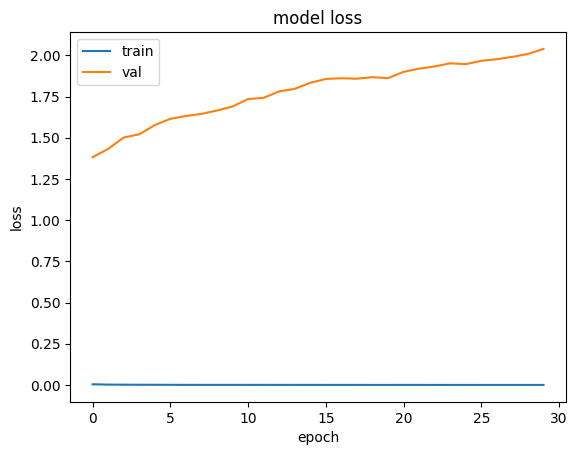

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [18]:
X_train.shape, y_train.shape

((1381, 256, 256, 3), (1381,))

In [19]:
X_test.shape, y_test.shape

((154, 256, 256, 3), (154,))

In [20]:
X_val.shape, y_val.shape

((224, 256, 256, 3), (224,))

In [21]:
np.save("/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/training_models/time complexity/X_train", np.asarray(X_train, dtype=np.float32), allow_pickle=True, fix_imports=True)
np.save("/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/training_models/time complexity/y_train", np.asarray(y_train, dtype=np.float32), allow_pickle=True, fix_imports=True)

In [22]:
np.save("/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/training_models/time complexity/X_val", np.asarray(X_val, dtype=np.float32), allow_pickle=True, fix_imports=True)
np.save("/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/training_models/time complexity/y_val", np.asarray(y_val, dtype=np.float32), allow_pickle=True, fix_imports=True)

In [23]:
np.save("/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/training_models/time complexity/X_test", np.asarray(X_test, dtype=np.float32), allow_pickle=True, fix_imports=True)
np.save("/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/training_models/time complexity/y_test", np.asarray(y_test, dtype=np.float32), allow_pickle=True, fix_imports=True)

In [36]:
tf.keras.utils.plot_model(vgg_model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [35]:
!pip install graphviz